In [1]:
import numpy as np

In [2]:
class Linear_Regression():
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
     Y_prediction = self.predict(self.X)

     dw = -(2*(self.X.T).dot(self.Y - Y_prediction)) / self.m
     db = -(2*np.sum(self.Y - Y_prediction))/self.m

     self.w = self.w - self.learning_rate*dw
     self.b = self.b - self.learning_rate*db

  def predict(self, X):
    return X.dot(self.w) + self.b

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [4]:
dataset = pd.read_csv("/content/salary_data.csv")

In [6]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
dataset.isnull().sum()

,0
YearsExperience,0
Salary,0


In [9]:
dataset.shape

(30, 2)

In [13]:
X = dataset.drop(columns = 'Salary',axis=1)
Y = dataset['Salary']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=42)

In [15]:
regression_model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [23]:
regression_model.fit(X_train, Y_train)
print(regression_model.w, regression_model.b)
test_prediction = regression_model.predict(X_test)

YearsExperience    9426.693189
dtype: float64 25320.15213700187


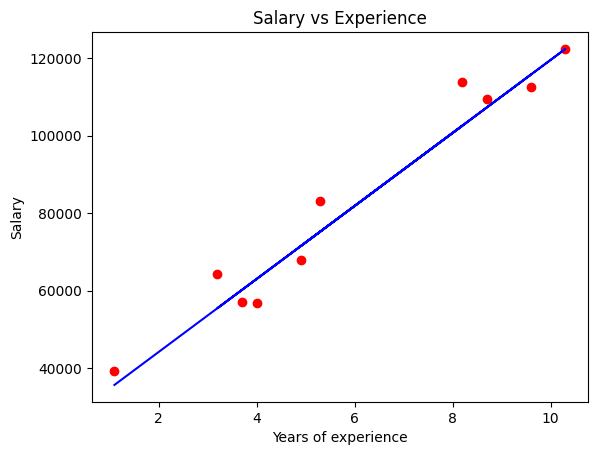

In [20]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_prediction, color = 'blue')
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()